In [ ]:
documents = ["I love python programming",
             "Python programming is fun",
             "I do not love the bugs in the code"]
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(documents)
vacabulary = vectorizer.get_feature_names_out()
print(vacabulary)
print(bow_matrix.toarray())

['bugs' 'code' 'do' 'fun' 'in' 'is' 'love' 'not' 'programming' 'python'
 'the']
[[0 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 1 0 1 0 0 1 1 0]
 [1 1 1 0 1 0 1 1 0 0 2]]


In [ ]:
documents = ["I love python programming",
             "Python programming is fun",
             "I do not love the bugs in the code"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
df = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names_out())
df.head()

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ["I love python programming",
             "Python programming is fun",
             "I do not love the bugs in the code"]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df.head())


       bugs      code        do       fun        in        is      love  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.577350   
1  0.000000  0.000000  0.000000  0.562829  0.000000  0.562829  0.000000   
2  0.323112  0.323112  0.323112  0.000000  0.323112  0.000000  0.245735   

        not  programming    python       the  
0  0.000000     0.577350  0.577350  0.000000  
1  0.000000     0.428046  0.428046  0.000000  
2  0.323112     0.000000  0.000000  0.646225  


In [ ]:
!pip install gensim

# Example corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "A journey of a thousand miles begins with a single step",
    "To be or not to be that is the question",
    "All that glitters is not gold",
    "The early bird catches the worm"
]


# Tokenize the sentences
tokenized_corpus = [sentence.lower().split() for sentence in corpus]
print("Tokenized Corpus:")
print(tokenized_corpus)

## train the worde2vec model
from gensim.models import word2vec
model=word2vec.Word2Vec(tokenized_corpus,vector_size=50,window=5,min_count=1,sg=0,epochs=10)
model.save("word2vec.model")

## inspect the words
word_vectors=model.wv['quick']
print('Word Vector for "quick":')
print(word_vectors)

## similar words
# Most similar words to 'quick'
similar_words = model.wv.most_similar('quick', topn=5)
print("\nMost Similar Words to 'quick':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

Tokenized Corpus:
[['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'], ['a', 'journey', 'of', 'a', 'thousand', 'miles', 'begins', 'with', 'a', 'single', 'step'], ['to', 'be', 'or', 'not', 'to', 'be', 'that', 'is', 'the', 'question'], ['all', 'that', 'glitters', 'is', 'not', 'gold'], ['the', 'early', 'bird', 'catches', 'the', 'worm']]
Word Vector for "quick":
[ 1.63365509e-02 -8.88313353e-03  1.79664157e-02  1.65028963e-02
 -8.87464173e-03  5.95138292e-04  8.55102576e-03 -7.84982834e-03
 -1.11201750e-02 -1.30302953e-02 -1.34055549e-03 -5.98145183e-04
  8.93005449e-03 -4.94848238e-03 -3.51268391e-04  4.93132370e-03
  9.73986741e-03 -5.97300277e-05 -1.26837324e-02 -1.85293183e-02
  5.81947243e-05  1.33313015e-02  2.93719280e-03 -1.79299917e-02
 -1.58764198e-02  1.31070837e-02 -7.56893028e-03  1.25109488e-02
 -1.33644184e-02  1.69596560e-02 -1.30349286e-02  6.57520909e-03
 -2.10722000e-03 -1.35739306e-02 -6.57867081e-03 -2.32541515e-03
 -1.09341517e-02 -2.42256070e-03 

## **searchn and match**

In [ ]:
import re
pattern = r"\d+"
text = "007 is the jersy number of dhoni"
mat = re.match(pattern,text)
print(mat.group())

007


In [ ]:
import re
pattern = r"\w+"
text = "hey 007 is the jersy number of dhoni"
mat = re.match(pattern,text)
print(mat.group())

hey


In [ ]:
import re
pattern = r"\d+"
text = "hey 007 is the jersy number of dhoni"
mat = re.search(pattern,text)
print(mat.group())

007


# **findall**

In [ ]:
import re
pattern = r"\w+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.findall(pattern,text)
print(mat)

['hey', '007', 'is', 'the', 'jersy', 'number', 'of', 'dhoni']


In [ ]:
import re
pattern = r"\W+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.findall(pattern,text)
print(mat)

[' %', ' ', ' ', ' ', ' #', ' ', ' ']


In [ ]:
import re
pattern = r"\s+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.findall(pattern,text)
print(mat)

[' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [ ]:
import re
pattern = r"\S+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.findall(pattern,text)
print(mat)

['hey', '%007', 'is', 'the', 'jersy', '#number', 'of', 'dhoni']


In [ ]:
import re
pattern = r"\D+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.findall(pattern,text)
print(mat)

['hey %', ' is the jersy #number of dhoni']


# sub and **subn**



In [ ]:
import re
pattern = r"\d+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.sub(pattern,"hello",text)
print(mat)

hey %hello is the jersy #number of dhoni


In [ ]:
import re
pattern = r"\D+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.sub(pattern,"hello",text)
print(mat)

hello007hello


In [ ]:
import re
pattern = r"\w+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.sub(pattern,"hello",text)
print(mat)

hello %hello hello hello hello #hello hello hello


In [ ]:
import re
pattern = r"\W+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.sub(pattern,"hello",text)
print(mat)

heyhello007helloishellothehellojersyhellonumberhelloofhellodhoni


In [ ]:
import re
pattern = r"\s+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.sub(pattern,"hello",text)
print(mat)

heyhello%007helloishellothehellojersyhello#numberhelloofhellodhoni


In [ ]:
import re
pattern = r"\S+"
text = "hey %007 is the jersy #number of dhoni"
mat = re.subn(pattern,"hello",text)
print(mat)

('hello hello hello hello hello hello hello hello', 8)


In [ ]:
import re
pattern = r"\w+"
text = "Hello world! Contact us at info@example.com or support123@company.org. Follow us on social media: #AI #MachineLearning. Visit <a href='http://example.com'>our website</a> for more details. This is a test with number 1234."
mat = re.subn(pattern,"email",text)
print(mat)

("email email! email email email email@email.email email email@email.email. email email email email email: #email #email. email <email email='email://email.email'>email email</email> email email email. email email email email email email email.", 38)


In [ ]:
import re
text= """Hello world! Contact us at info@example.com or support123@company.org. Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number 1234.
"""
emails = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)
print(emails)


['info@example.com', 'support123@company.org']


In [ ]:
hashtags = re.findall(r'#\w+', text)
print(hashtags)

['#AI', '#MachineLearning']


In [ ]:
text_no_numbers = re.sub(r'\d+', '', text)
print(text_no_numbers)

Hello world! Contact us at info@example.com or support@company.org. Follow us on social media: #AI #MachineLearning.
Visit <a href="http://example.com">our website</a> for more details. This is a test with number .



In [ ]:
text_no_html = re.sub(r'<.*?>', '', text_no_numbers)
print(text_no_html)

Hello world! Contact us at info@example.com or support@company.org. Follow us on social media: #AI #MachineLearning.
Visit our website for more details. This is a test with number .




# POS Taggin **Spacy**



In [ ]:
import pandas as pd
text = ['Sarah lives in a hut in the village.',
        'She has an apple tree in her backyard.',
        'The apples are red in colour.']
df = pd.DataFrame(text,columns = ['Sentence'])
df

,Sentence
0,Sarah lives in a hut in the village.
1,She has an apple tree in her backyard.
2,The apples are red in colour.


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
token = []
pos =[]
for sent in nlp.pipe(df['Sentence']):
  if sent.has_annotation('DEP'):
    token.append([word.text for word in sent])
    pos.append([word.pos_ for word in sent])

In [ ]:
token

[['Sarah', 'lives', 'in', 'a', 'hut', 'in', 'the', 'village', '.'],
 ['She', 'has', 'an', 'apple', 'tree', 'in', 'her', 'backyard', '.'],
 ['The', 'apples', 'are', 'red', 'in', 'colour', '.']]

In [ ]:
pos

[['PROPN', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT'],
 ['PRON', 'VERB', 'DET', 'NOUN', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT'],
 ['DET', 'NOUN', 'AUX', 'ADJ', 'ADP', 'NOUN', 'PUNCT']]

In [ ]:
df['token'] = token
df['pos'] = pos
df.head()

,Sentence,token,pos
0,Sarah lives in a hut in the village.,"[Sarah, lives, in, a, hut, in, the, village, .]","[PROPN, VERB, ADP, DET, NOUN, ADP, DET, NOUN, ..."
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,..."
2,The apples are red in colour.,"[The, apples, are, red, in, colour, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]"


In [ ]:
df['noun'] = df.apply(lambda x:x['pos'].count('NOUN'),axis=1)
df['verb'] = df.apply(lambda x:x['pos'].count('VERB'),axis=1)
df['adj'] = df.apply(lambda x:x['pos'].count('ADJ'),axis=1)
df['punct'] = df.apply(lambda x:x['pos'].count('PUNCT'),axis=1)
df

,Sentence,token,pos,noun,verb,adj,punct
0,Sarah lives in a hut in the village.,"[Sarah, lives, in, a, hut, in, the, village, .]","[PROPN, VERB, ADP, DET, NOUN, ADP, DET, NOUN, ...",2,1,0,1
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,...",3,1,0,1
2,The apples are red in colour.,"[The, apples, are, red, in, colour, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]",2,0,1,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df['Rating'].value_counts()


,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


In [ ]:

def ratings(rating):
  if rating>3 and rating <=5:
    return "positive"
  if rating>0 and rating<=3:
    return "negative"


In [ ]:
df['Rating'] = df['Rating'].apply(ratings)

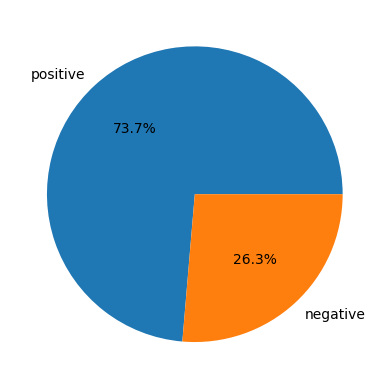

In [ ]:
plt.pie(df['Rating'].value_counts(),
        labels=df['Rating'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()

In [ ]:
length = len(df['Review'][0])
print(f'Length of the first review is {length}')

Length of the first review is 593


In [ ]:
df['Length'] = df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,positive,593
1,ok nothing special charge diamond member hilto...,negative,1689
2,nice rooms not 4* experience hotel monaco seat...,negative,1427
3,"unique, great stay, wonderful time hotel monac...",positive,600
4,"great stay great stay, went seahawk game aweso...",positive,1281


In [ ]:
word_count = df['Review'][0].split()
print(f'Word count in a simple review: {len(word_count)}')

Word count in a simple review: 87


In [ ]:
def word_count(review):
  review_list = review.split()
  return len(review_list)

In [ ]:
df['Word_count'] = df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,positive,593,87
1,ok nothing special charge diamond member hilto...,negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",positive,600,89
4,"great stay great stay, went seahawk game aweso...",positive,1281,191


In [ ]:
df['mean_word_length'] = df['Review'].map(lambda rev:np.mean([len(word) for word in rev.split()]) )
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",positive,1281,191,5.701571


In [ ]:
from nltk import tokenize
import nltk
nltk.download('punkt_tab')
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


591.0

In [ ]:
df['mean_word_length'] = df['Review'].map(lambda rev:np.mean([len(word) for word in rev.split()]) )
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",positive,1281,191,5.701571
